In [4]:
# Input data

import scipy.io as spio
import numpy as np

# Reading the data for the Face from all the subjects
BahramFace = spio.loadmat(file_name='../data/bci-project-data-RAW/BahramFace.mat')
DJFace = spio.loadmat(file_name='../data/bci-project-data-RAW/DJFace.mat')
NickFace = spio.loadmat(file_name='../data/bci-project-data-RAW/NickFace.mat')
RoohiFace = spio.loadmat(file_name='../data/bci-project-data-RAW/RoohiFace.mat')
SarahFace = spio.loadmat(file_name='../data/bci-project-data-RAW/SarahFace.mat')

# Deviding the input data into train and validation
# For creating the training and testing set, 30% percent of each subject is considered as test and
# 70% of each subject is conidered as training.
length = int(BahramFace['Intensification_Data'].shape[0] * 0.30)
length

FacesDataAll = np.vstack(tup=(BahramFace['Intensification_Data'][:], 
                       DJFace['Intensification_Data'][:], 
                       NickFace['Intensification_Data'][:],
                      RoohiFace['Intensification_Data'][:],
                      SarahFace['Intensification_Data'][:]))

FacesDataTrainAll = np.vstack(tup=(BahramFace['Intensification_Data'][:-length], 
                       DJFace['Intensification_Data'][:-length], 
                       NickFace['Intensification_Data'][:-length],
                      RoohiFace['Intensification_Data'][:-length],
                      SarahFace['Intensification_Data'][:-length]))

FacesDataTest = np.vstack(tup=(BahramFace['Intensification_Data'][-length:], 
                       DJFace['Intensification_Data'][-length:], 
                       NickFace['Intensification_Data'][-length:],
                      RoohiFace['Intensification_Data'][-length:],
                      SarahFace['Intensification_Data'][-length:]))

(FacesDataAll.shape, FacesDataAll.dtype, 
 FacesDataTest.shape, FacesDataTest.dtype, 
 FacesDataTrainAll.shape, FacesDataTrainAll.dtype)

BahramFaceDataTrain = BahramFace['Intensification_Data'][:-length]
DJFaceDataTrain = DJFace['Intensification_Data'][:-length]
NickFaceDataTrain = NickFace['Intensification_Data'][:-length]
RoohiFaceDataTrain = RoohiFace['Intensification_Data'][:-length]
SarahFaceDataTrain = SarahFace['Intensification_Data'][:-length]

# 30% of the total training data is validation,
# 70% of the total training data is training
# This is applied to every single subject data.
length2 = int(BahramFaceDataTrain.shape[0] * 0.30)
length2

FacesDataTrain = np.vstack(tup=(BahramFaceDataTrain[:-length2], 
                       DJFaceDataTrain[:-length2], 
                       NickFaceDataTrain[:-length2],
                      RoohiFaceDataTrain[:-length2],
                      SarahFaceDataTrain[:-length2]))

FacesDataValid = np.vstack(tup=(BahramFaceDataTrain[-length2:], 
                       DJFaceDataTrain[-length2:], 
                       NickFaceDataTrain[-length2:],
                      RoohiFaceDataTrain[-length2:],
                      SarahFaceDataTrain[-length2:]))

(FacesDataTrainAll.shape, FacesDataTrainAll.dtype, 
 FacesDataTrain.shape, FacesDataTrain.dtype, 
 FacesDataValid.shape, FacesDataValid.dtype)

FacesLabelAll = np.vstack(tup=(BahramFace['Intensification_Label'][:], 
                       DJFace['Intensification_Label'][:], 
                       NickFace['Intensification_Label'][:],
                      RoohiFace['Intensification_Label'][:],
                      SarahFace['Intensification_Label'][:]))

FacesLabelTrainAll = np.vstack(tup=(BahramFace['Intensification_Label'][:-length], 
                       DJFace['Intensification_Label'][:-length], 
                       NickFace['Intensification_Label'][:-length],
                      RoohiFace['Intensification_Label'][:-length],
                      SarahFace['Intensification_Label'][:-length]))

FacesLabelTest = np.vstack(tup=(BahramFace['Intensification_Label'][-length:], 
                       DJFace['Intensification_Label'][-length:], 
                       NickFace['Intensification_Label'][-length:],
                      RoohiFace['Intensification_Label'][-length:],
                      SarahFace['Intensification_Label'][-length:]))

(FacesLabelAll.shape, FacesLabelAll.dtype,
 FacesLabelTest.shape, FacesLabelTest.dtype, 
 FacesLabelTrainAll.shape, FacesLabelTrainAll.dtype)

BahramFaceLabelTrain = BahramFace['Intensification_Label'][:-length]
DJFaceLabelTrain = DJFace['Intensification_Label'][:-length]
NickFaceLabelTrain = NickFace['Intensification_Label'][:-length]
RoohiFaceLabelTrain = RoohiFace['Intensification_Label'][:-length]
SarahFaceLabelTrain = SarahFace['Intensification_Label'][:-length]

FacesLabelTrain = np.vstack(tup=(BahramFaceLabelTrain[:-length2], 
                       DJFaceLabelTrain[:-length2], 
                       NickFaceLabelTrain[:-length2],
                      RoohiFaceLabelTrain[:-length2],
                      SarahFaceLabelTrain[:-length2]))

FacesLabelValid = np.vstack(tup=(BahramFaceLabelTrain[-length2:], 
                       DJFaceLabelTrain[-length2:], 
                       NickFaceLabelTrain[-length2:],
                      RoohiFaceLabelTrain[-length2:],
                      SarahFaceLabelTrain[-length2:]))

# # Normalizing input data
# def normalize(inputs, inputs_all):
#     return (inputs - inputs_all.mean(axis=0)[None,:,:]) / inputs_all.std(axis=0)[None,:,:]
# Yalda suggested this normalization.
def normalize(inputs):
    return (inputs - inputs.mean(axis=0)[None,:,:]) / inputs.std(axis=0)[None,:,:]

# onehot vectorizing output labels
def one_hot(labels, n_class):
    """ One-hot encoding """
    expansion = np.eye(n_class)
    y = expansion[:, labels-1].T
    assert y.shape[1] == n_class, "Wrong number of labels!"

    return y

# get minibatches for learning
def get_batches(X, y, batch_size):
    """ Return a generator for batches """
    n_batches = len(X) // batch_size
    X, y = X[:n_batches*batch_size], y[:n_batches*batch_size]

    # Loop over batches and yield
    for b in range(0, len(X), batch_size):
        yield X[b:b+batch_size], y[b:b+batch_size]

# Standardize/normalize train and test
# X_train_norm_all = normalize(inputs=FacesDataTrain, inputs_all=FacesDataAll)
X_train_norm = normalize(inputs=FacesDataTrain)
X_valid_norm = normalize(inputs=FacesDataValid)
X_test_norm = normalize(inputs=FacesDataTest)

(X_train_norm.shape, X_train_norm.dtype, 
X_valid_norm.shape, X_valid_norm.dtype,
X_test_norm.shape, X_test_norm.dtype)

### Hyperparameters

# Input data
batch_size = X_train_norm.shape[0]// 100 # minibatch size & number of minibatches
seq_len = X_train_norm.shape[1] # Number of steps: each trial length
n_channels = X_train_norm.shape[2] # number of channels in each trial

# Output labels
n_classes = int(FacesLabelAll.max() + 1)

# Tweekable parameters
learning_rate = 0.001 #1e-3
epochs = 5 # num iterations for updating model
keep_prob = 0.50 # 90% neurons are kept and 10% are dropped out

Y_train = np.array(FacesLabelTrain, dtype=int).reshape(-1)
Y_valid = np.array(FacesLabelValid, dtype=int).reshape(-1)
Y_test = np.array(FacesLabelTest, dtype=int).reshape(-1)

Y_train_onehot = one_hot(labels=Y_train, n_class=n_classes)
Y_valid_onehot = one_hot(labels=Y_valid, n_class=n_classes)
Y_test_onehot = one_hot(labels=Y_test, n_class=n_classes)

(Y_train_onehot.shape, Y_valid_onehot.shape, Y_test_onehot.shape, 
 X_train_norm.shape, X_valid_norm.shape, X_test_norm.shape)

(Y_train_onehot.dtype, Y_valid_onehot.dtype, Y_test_onehot.dtype,
 X_train_norm.dtype, X_valid_norm.dtype, X_test_norm.dtype)

# GPUs or CPU

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

#  No graphs is needed on tensorflow
inputs_ = tf.placeholder(tf.float32, [None, seq_len, n_channels], name = 'inputs_')
labels_ = tf.placeholder(tf.float32, [None, n_classes], name = 'labels_')
keep_prob_ = tf.placeholder(tf.float32, name = 'keep_prob_')
learning_rate_ = tf.placeholder(tf.float32, name = 'learning_rate_')# Construct the LSTM inputs and LSTM cells

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


In [5]:
# (batch, 205, 16) --> (batch, 101, 32)
# (205 - 5 + 0)/2 + 1 = 100+1= 101
# 2/5 with strides/kernel_size is 40% non-overlap/diff region and 60% overlapping window/ common region
in_conv = inputs_
out_conv = tf.layers.conv1d(inputs=in_conv, filters=32, kernel_size=5, strides=2, padding='valid')
out_conv = tf.layers.batch_normalization(inputs=out_conv)
out_conv = tf.nn.relu(features=out_conv)
out_conv = tf.nn.dropout(x=out_conv, keep_prob=keep_prob_)
print(out_conv.shape)

# (batch, 101, 32) --> (batch, 49, 64)
# (101 - 5 + 0)/2 + 1 = (96/2)+1= 48+1= 49
# 2/5 with strides/kernel_size is 40% non-overlap/diff region and 60% overlapping window/ common region
in_conv = out_conv
out_conv = tf.layers.conv1d(inputs=in_conv, filters=64, kernel_size=5, strides=2, padding='valid')
out_conv = tf.layers.batch_normalization(inputs=out_conv)
out_conv = tf.nn.relu(features=out_conv)
out_conv = tf.nn.dropout(x=out_conv, keep_prob=keep_prob_)
print(out_conv.shape)

(?, 101, 32)
(?, 49, 64)


In [6]:
#  This functions very similar to embedding
print(out_conv.shape)
lstm_in = tf.transpose(out_conv, [1,0,2]) # reshape into (seq_len, N, channels)
print(lstm_in.shape)
lstm_in = tf.reshape(lstm_in, [-1, 64]) # Now (seq_len*N, n_channels)
print(lstm_in.shape)

# To cells
lstm_size = 64*3 # 3 times the amount of channels
print(lstm_size)
lstm_layers = 1        # Number of layers
lstm_in = tf.layers.dense(lstm_in, lstm_size, activation=None) # or tf.nn.relu, tf.nn.sigmoid, tf.nn.tanh?
print(lstm_in.shape)

# Open up the tensor into a list of seq_len pieces
lstm_in = tf.split(lstm_in, 49, 0)
print(len(lstm_in))

(?, 49, 64)
(49, ?, 64)
(?, 64)
192
(?, 192)
49


In [7]:
# Add LSTM layers
# lstm = tf.contrib.rnn.BasicLSTMCell(lstm_size)
lstm = tf.nn.rnn_cell.BasicLSTMCell(lstm_size)
print(lstm)
# drop = tf.contrib.rnn.DropoutWrapper(lstm, output_keep_prob=keep_prob_)
drop = tf.nn.rnn_cell.DropoutWrapper(lstm, output_keep_prob=keep_prob_)
print(drop)
# cell = tf.contrib.rnn.MultiRNNCell([drop] * lstm_layers)
cell = tf.nn.rnn_cell.MultiRNNCell([drop] * lstm_layers)
print(cell)
initial_state = cell.zero_state(batch_size, tf.float32)
print(initial_state)

(LSTMStateTuple(c=<tf.Tensor 'MultiRNNCellZeroState/DropoutWrapperZeroState/BasicLSTMCellZeroState/zeros:0' shape=(95, 192) dtype=float32>, h=<tf.Tensor 'MultiRNNCellZeroState/DropoutWrapperZeroState/BasicLSTMCellZeroState/zeros_1:0' shape=(95, 192) dtype=float32>),)


In [8]:
# Reuse should be activated
#  NOTE: should be run ONCE
# Remember the inputs are usually embedded input or texts
# outputs, final_state = tf.contrib.rnn.static_rnn(cell=cell, inputs=lstm_in, dtype=tf.float32, 
#                                                  initial_state = initial_state)
outputs, final_state = tf.nn.static_rnn(cell=cell, inputs=lstm_in, dtype=tf.float32,
                                        initial_state = initial_state)
# outputs, final_state = tf.nn.dynamic_rnn(cell, lstm_in, dtype=tf.float32, 
#                                          initial_state=initial_state)# print(outputs, final_state)

In [9]:
# We only need the last output tensor to pass into a classifier
logits = tf.layers.dense(outputs[-1], n_classes, name='logits')
print(logits, outputs[-1])

Tensor("logits/BiasAdd:0", shape=(95, 2), dtype=float32) Tensor("rnn/rnn/multi_rnn_cell/cell_0_48/dropout/mul:0", shape=(95, 192), dtype=float32)


In [10]:
# Cost function
cost_tensor = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels_)
cost = tf.reduce_mean(input_tensor=cost_tensor)

# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate_).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(labels_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

### Train the network

In [11]:
# Plotting the acc and loss curve
train_acc = []
train_loss = []

valid_acc = []
valid_loss = []

with tf.Session() as sess:
    # initalize session global variables just in the case they are initialized.
    sess.run(tf.global_variables_initializer())
    
    for e in range(epochs):
        # Initialize 
        state = sess.run(initial_state)
        
        # Loop over batches
        for x, y in get_batches(X_train_norm, Y_train_onehot, batch_size):
            
            # Feed dictionary
            feed = {inputs_:x, labels_:y, keep_prob_: keep_prob, initial_state:state, 
                    learning_rate_:learning_rate}
            loss, _ , state, acc = sess.run([cost, optimizer, final_state, accuracy], feed_dict = feed)
            
            train_acc.append(acc)
            train_loss.append(loss)
            
            ################################ Validation
            # Initialize 
            state_v = sess.run(cell.zero_state(batch_size, tf.float32))
            loss_v_batch, acc_v_batch = [], []

            # Loop over batches
            for x_v, y_v in get_batches(X_valid_norm, Y_valid_onehot, batch_size):

                # Feed dictionary
                feed = {inputs_:x_v, labels_:y_v, keep_prob_: 1.0, initial_state:state_v}
                loss_v, state_v, acc_v = sess.run([cost, final_state, accuracy], feed_dict = feed)
                
                acc_v_batch.append(acc_v)
                loss_v_batch.append(loss_v)
                
            valid_acc.append(np.mean(acc_v_batch))
            valid_loss.append(np.mean(loss_v_batch))
            
            # Print info
            print("Epoch: {}/{}".format(e+1, epochs),
                  "Train loss: {:6f}".format(loss),
                  "Valid loss: {:.6f}".format(np.mean(valid_loss)),
                  "Train acc: {:6f}".format(acc),
                  "Valid acc: {:.6f}".format(np.mean(valid_acc)))
            
    ################################ Test
    # Initialize 
    state = sess.run(initial_state)
    acc_batch, loss_batch = [], []

    # Loop over batches
    for x, y in get_batches(X_test_norm, Y_test_onehot, batch_size):

        # Feed dictionary
        feed = {inputs_:x, labels_:y, keep_prob_:1.0, initial_state:state}
        loss, state, acc = sess.run([cost, final_state, accuracy], feed_dict = feed)

        acc_batch.append(acc)
        loss_batch.append(loss)

    # Print info
    print("Epoch: {}/{}".format(e+1, epochs),
          "Test loss: {:6f}".format(np.mean(loss_batch)),
          "Test acc: {:6f}".format(np.mean(acc_batch)))

Epoch: 1/5 Train loss: 0.702395 Valid loss: 0.490271 Train acc: 0.389474 Valid acc: 0.833468
Epoch: 1/5 Train loss: 0.520863 Valid loss: 0.482522 Train acc: 0.842105 Valid acc: 0.833468
Epoch: 1/5 Train loss: 0.456551 Valid loss: 0.512809 Train acc: 0.831579 Valid acc: 0.833468
Epoch: 1/5 Train loss: 0.467952 Valid loss: 0.532558 Train acc: 0.831579 Valid acc: 0.833468
Epoch: 1/5 Train loss: 0.475082 Valid loss: 0.536061 Train acc: 0.831579 Valid acc: 0.833468
Epoch: 1/5 Train loss: 0.502555 Valid loss: 0.530331 Train acc: 0.831579 Valid acc: 0.833468
Epoch: 1/5 Train loss: 0.469128 Valid loss: 0.522124 Train acc: 0.831579 Valid acc: 0.833468
Epoch: 1/5 Train loss: 0.463814 Valid loss: 0.514640 Train acc: 0.831579 Valid acc: 0.833468
Epoch: 1/5 Train loss: 0.459362 Valid loss: 0.508546 Train acc: 0.831579 Valid acc: 0.833468
Epoch: 1/5 Train loss: 0.458947 Valid loss: 0.503631 Train acc: 0.842105 Valid acc: 0.833468
Epoch: 1/5 Train loss: 0.473211 Valid loss: 0.499749 Train acc: 0.8315

Epoch: 1/5 Train loss: 0.453217 Valid loss: 0.463501 Train acc: 0.842105 Valid acc: 0.833468
Epoch: 1/5 Train loss: 0.466371 Valid loss: 0.463349 Train acc: 0.821053 Valid acc: 0.833468
Epoch: 1/5 Train loss: 0.443439 Valid loss: 0.463216 Train acc: 0.831579 Valid acc: 0.833468
Epoch: 1/5 Train loss: 0.455469 Valid loss: 0.463099 Train acc: 0.831579 Valid acc: 0.833468
Epoch: 1/5 Train loss: 0.426231 Valid loss: 0.463001 Train acc: 0.852632 Valid acc: 0.833468
Epoch: 1/5 Train loss: 0.458252 Valid loss: 0.462909 Train acc: 0.821053 Valid acc: 0.833468
Epoch: 1/5 Train loss: 0.414155 Valid loss: 0.462825 Train acc: 0.842105 Valid acc: 0.833468
Epoch: 1/5 Train loss: 0.445480 Valid loss: 0.462740 Train acc: 0.831579 Valid acc: 0.833468
Epoch: 1/5 Train loss: 0.438615 Valid loss: 0.462655 Train acc: 0.831579 Valid acc: 0.833468
Epoch: 1/5 Train loss: 0.430765 Valid loss: 0.462576 Train acc: 0.842105 Valid acc: 0.833468
Epoch: 1/5 Train loss: 0.445378 Valid loss: 0.462497 Train acc: 0.8315

Epoch: 2/5 Train loss: 0.498743 Valid loss: 0.458167 Train acc: 0.810526 Valid acc: 0.833473
Epoch: 2/5 Train loss: 0.427400 Valid loss: 0.458097 Train acc: 0.852632 Valid acc: 0.833473
Epoch: 2/5 Train loss: 0.452405 Valid loss: 0.458027 Train acc: 0.831579 Valid acc: 0.833473
Epoch: 2/5 Train loss: 0.448762 Valid loss: 0.457955 Train acc: 0.831579 Valid acc: 0.833473
Epoch: 2/5 Train loss: 0.452476 Valid loss: 0.457881 Train acc: 0.831579 Valid acc: 0.833473
Epoch: 2/5 Train loss: 0.463701 Valid loss: 0.457805 Train acc: 0.831579 Valid acc: 0.833473
Epoch: 2/5 Train loss: 0.437787 Valid loss: 0.457727 Train acc: 0.831579 Valid acc: 0.833473
Epoch: 2/5 Train loss: 0.463951 Valid loss: 0.457649 Train acc: 0.831579 Valid acc: 0.833473
Epoch: 2/5 Train loss: 0.453980 Valid loss: 0.457571 Train acc: 0.831579 Valid acc: 0.833473
Epoch: 2/5 Train loss: 0.448750 Valid loss: 0.457493 Train acc: 0.831579 Valid acc: 0.833473
Epoch: 2/5 Train loss: 0.469551 Valid loss: 0.457418 Train acc: 0.8315

Epoch: 3/5 Train loss: 0.477819 Valid loss: 0.454908 Train acc: 0.831579 Valid acc: 0.833456
Epoch: 3/5 Train loss: 0.460855 Valid loss: 0.454861 Train acc: 0.831579 Valid acc: 0.833456
Epoch: 3/5 Train loss: 0.442158 Valid loss: 0.454815 Train acc: 0.831579 Valid acc: 0.833456
Epoch: 3/5 Train loss: 0.432806 Valid loss: 0.454768 Train acc: 0.831579 Valid acc: 0.833456
Epoch: 3/5 Train loss: 0.441635 Valid loss: 0.454721 Train acc: 0.831579 Valid acc: 0.833457
Epoch: 3/5 Train loss: 0.436877 Valid loss: 0.454674 Train acc: 0.831579 Valid acc: 0.833457
Epoch: 3/5 Train loss: 0.439624 Valid loss: 0.454626 Train acc: 0.831579 Valid acc: 0.833457
Epoch: 3/5 Train loss: 0.462456 Valid loss: 0.454576 Train acc: 0.831579 Valid acc: 0.833457
Epoch: 3/5 Train loss: 0.435954 Valid loss: 0.454526 Train acc: 0.842105 Valid acc: 0.833457
Epoch: 3/5 Train loss: 0.456474 Valid loss: 0.454474 Train acc: 0.831579 Valid acc: 0.833457
Epoch: 3/5 Train loss: 0.436122 Valid loss: 0.454421 Train acc: 0.8421

Epoch: 4/5 Train loss: 0.404069 Valid loss: 0.448097 Train acc: 0.831579 Valid acc: 0.833622
Epoch: 4/5 Train loss: 0.421597 Valid loss: 0.448016 Train acc: 0.842105 Valid acc: 0.833621
Epoch: 4/5 Train loss: 0.446049 Valid loss: 0.447935 Train acc: 0.831579 Valid acc: 0.833621
Epoch: 4/5 Train loss: 0.410233 Valid loss: 0.447848 Train acc: 0.831579 Valid acc: 0.833621
Epoch: 4/5 Train loss: 0.388662 Valid loss: 0.447754 Train acc: 0.831579 Valid acc: 0.833620
Epoch: 4/5 Train loss: 0.360890 Valid loss: 0.447649 Train acc: 0.842105 Valid acc: 0.833620
Epoch: 4/5 Train loss: 0.431523 Valid loss: 0.447526 Train acc: 0.821053 Valid acc: 0.833621
Epoch: 4/5 Train loss: 0.514284 Valid loss: 0.447392 Train acc: 0.842105 Valid acc: 0.833623
Epoch: 4/5 Train loss: 0.531358 Valid loss: 0.447249 Train acc: 0.810526 Valid acc: 0.833625
Epoch: 4/5 Train loss: 0.525872 Valid loss: 0.447109 Train acc: 0.842105 Valid acc: 0.833627
Epoch: 4/5 Train loss: 0.497225 Valid loss: 0.446977 Train acc: 0.8315

Epoch: 5/5 Train loss: 0.405405 Valid loss: 0.438153 Train acc: 0.842105 Valid acc: 0.834691
Epoch: 5/5 Train loss: 0.394773 Valid loss: 0.438013 Train acc: 0.821053 Valid acc: 0.834720
Epoch: 5/5 Train loss: 0.367008 Valid loss: 0.437878 Train acc: 0.852632 Valid acc: 0.834744
Epoch: 5/5 Train loss: 0.313240 Valid loss: 0.437740 Train acc: 0.842105 Valid acc: 0.834764
Epoch: 5/5 Train loss: 0.421150 Valid loss: 0.437599 Train acc: 0.821053 Valid acc: 0.834784
Epoch: 5/5 Train loss: 0.334913 Valid loss: 0.437465 Train acc: 0.884211 Valid acc: 0.834799
Epoch: 5/5 Train loss: 0.365323 Valid loss: 0.437353 Train acc: 0.842105 Valid acc: 0.834805
Epoch: 5/5 Train loss: 0.456008 Valid loss: 0.437273 Train acc: 0.842105 Valid acc: 0.834809
Epoch: 5/5 Train loss: 0.422554 Valid loss: 0.437226 Train acc: 0.821053 Valid acc: 0.834813
Epoch: 5/5 Train loss: 0.378455 Valid loss: 0.437210 Train acc: 0.842105 Valid acc: 0.834814
Epoch: 5/5 Train loss: 0.485424 Valid loss: 0.437193 Train acc: 0.8000

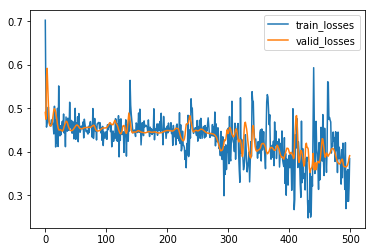

In [12]:
import matplotlib.pyplot as mplot

mplot.plot(train_loss, label='train_losses')
mplot.plot(valid_loss, label='valid_losses')
mplot.legend()
mplot.show()

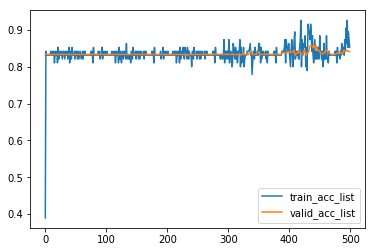

In [13]:
# import matplotlib.pyplot as mplot

mplot.plot(train_acc, label='train_acc_list')
mplot.plot(valid_acc, label='valid_acc_list')
mplot.legend()
mplot.show()